In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.backend import eval

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import math

Using TensorFlow backend.


In [0]:
# load the data
fashion_mnist = keras.datasets.fashion_mnist
# separate the data into train and test sets
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
# define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
# preprocess the data
train_images = train_images / 255.0

test_images = test_images / 255.0

Text(0.5,1,'Data Distribution For Each Class')

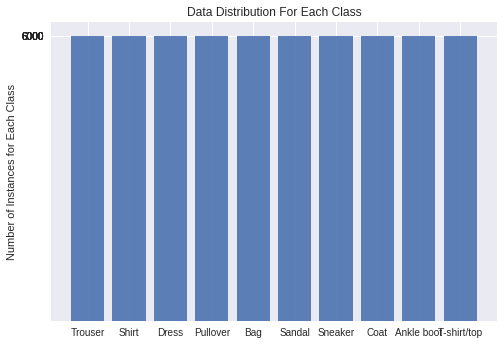

In [0]:
# Question 2(c)
# take preprocessed train_images and find the instances in each class (10 classes in total)
classification = {}
for i in range(len(train_labels)):
  if train_labels[i] not in classification.keys():
    classification[train_labels[i]] = 0
  classification[train_labels[i]] += 1

# draw the bar plot
plt.xticks(list(classification.keys()), class_names)
plt.yticks(list(classification.values()))
plt.bar(classification.keys(), classification.values(), align='center', alpha=0.9)
plt.ylabel('Number of Instances for Each Class')
plt.title('Data Distribution For Each Class')

In [0]:
# split the data into training and validation set with 70% and 30%
num_of_train = math.ceil(train_images.shape[0] * 0.7)

train_imgs = train_images[0:num_of_train]
train_lbs = train_labels[0:num_of_train]

valid_images = train_images[num_of_train:]
valid_labels = train_labels[num_of_train:]

# reshape the data for training model later
train_imgs = train_imgs.reshape(train_imgs.shape[0], train_imgs.shape[1], train_imgs.shape[2], 1)
valid_images = valid_images.reshape(valid_images.shape[0], valid_images.shape[1], valid_images.shape[2], 1)

In [0]:
# Question 2(d)
# build the model
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu'),
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model
model.compile(optimizer=keras.optimizers.Adam(lr=0.0004), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# train the model
model.fit(train_imgs, train_lbs, validation_data=(valid_images, valid_labels), epochs=10)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 84s 2ms/step - loss: 0.6269 - acc: 0.7707 - val_loss: 0.4436 - val_acc: 0.8393
Epoch 2/10
42000/42000 [==============================] - 82s 2ms/step - loss: 0.4068 - acc: 0.8501 - val_loss: 0.3881 - val_acc: 0.8602
Epoch 3/10
42000/42000 [==============================] - 82s 2ms/step - loss: 0.3505 - acc: 0.8717 - val_loss: 0.3522 - val_acc: 0.8705
Epoch 4/10
42000/42000 [==============================] - 82s 2ms/step - loss: 0.3139 - acc: 0.8850 - val_loss: 0.3166 - val_acc: 0.8850
Epoch 5/10
42000/42000 [==============================] - 82s 2ms/step - loss: 0.2855 - acc: 0.8949 - val_loss: 0.3120 - val_acc: 0.8892
Epoch 6/10
42000/42000 [==============================] - 82s 2ms/step - loss: 0.2655 - acc: 0.9025 - val_loss: 0.3038 - val_acc: 0.8914
Epoch 7/10
42000/42000 [==============================] - 81s 2ms/step - loss: 0.2488 - acc: 0.9085 - val_loss: 0.2816 - val_acc

In [0]:
# test accuracy on test set
test_images = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)
test_results = model.evaluate(test_images, test_labels)
print(test_results)

10000/10000 [==============================] - 5s 466us/step
[0.2699609413146973, 0.9037]


In [0]:
# Question 2(f) and Question 2(g)
# define and compile the model again
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu'),
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.Adam(lr=0.0004), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
train_acc = {8:[], 16:[], 32:[], 64:[]}
valid_acc = {8:[], 16:[], 32:[], 64:[]}
train_loss = {8:[], 16:[], 32:[], 64:[]}
valid_loss = {8:[], 16:[], 32:[], 64:[]}
test_acc = {8:[], 16:[], 32:[], 64:[]}
test_loss = {8:[], 16:[], 32:[], 64:[]}

In [0]:
# write a training loop, stop training when validation accuracy stops increasing (avoid overfitting)
accuracy = 0
count = 0
# hard code here, change value manually, before running training loop, redefine and recompile the model first
batch_value = 64

while True:
  history_for_train = model.fit(train_imgs, train_lbs, epochs=1, batch_size=batch_value).history

  count += 1

  results_for_valid = model.evaluate(valid_images, valid_labels)

  results_for_test = model.evaluate(test_images, test_labels)

  acc = results_for_valid[1]

  if (acc - accuracy) >= 0:
    accuracy = acc

    print("train: "+str(history_for_train)+"\n")
    print("valid: "+str(results_for_valid)+"\n")
    print("test: "+str(results_for_test)+"\n")

    train_acc[batch_value].append(history_for_train['acc'][0])
    train_loss[batch_value].append(history_for_train['loss'][0])
    
    valid_acc[batch_value].append(results_for_valid[1])
    valid_loss[batch_value].append(results_for_valid[0])
    
    test_acc[batch_value].append(results_for_test[1])
    test_loss[batch_value].append(results_for_test[0])
  else:
    break

Epoch 1/1
10000/10000 [==============================] - 6s 554us/step
train: {'loss': [0.7024824530510675], 'acc': [0.7439523809523809]}

valid: [0.5103577332496643, 0.8043333333333333]

test: [0.5276947018146515, 0.8024]

Epoch 1/1
10000/10000 [==============================] - 5s 497us/step
train: {'loss': [0.45480223287854876], 'acc': [0.8348571428571429]}

valid: [0.44444744993580715, 0.8326111111111111]

test: [0.4624392665147781, 0.8292]

Epoch 1/1
10000/10000 [==============================] - 5s 493us/step
train: {'loss': [0.394946858110882], 'acc': [0.858]}

valid: [0.37470920848846434, 0.8671666666666666]

test: [0.39036175234317777, 0.8606]

Epoch 1/1
10000/10000 [==============================] - 5s 547us/step
train: {'loss': [0.35040108539944603], 'acc': [0.8729047619047619]}

valid: [0.34634155771467423, 0.8761111111111111]

test: [0.3600529313325882, 0.8712]

Epoch 1/1
10000/10000 [==============================] - 5s 492us/step
train: {'loss': [0.32144691375323703], 'a

In [0]:
# print(train_acc)
# print(train_loss)
# print(valid_acc)
# print(valid_loss)
# print(test_acc)
# print(test_loss)

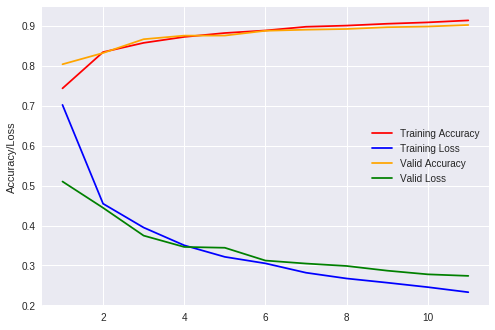

In [0]:
# plot train_acc, valid_acc, train_loss, valid_loss for each batch size
# batch size 8, manually change batch size here to generate different graphs
y_list = list(range(1, len(train_acc[64])+1))
plt.plot(y_list, train_acc[64], color='red', label='Training Accuracy')
plt.plot(y_list, train_loss[64], color='blue', label='Training Loss')
plt.plot(y_list, valid_acc[64], color='orange', label='Valid Accuracy')
plt.plot(y_list, valid_loss[64], color='green', label='Valid Loss')
plt.ylabel('Accuracy/Loss')
plt.legend()